['PI left v1', 'PI right v1', 'PI world v1', 'Gaze']
03-26-2023 15:06:19.629


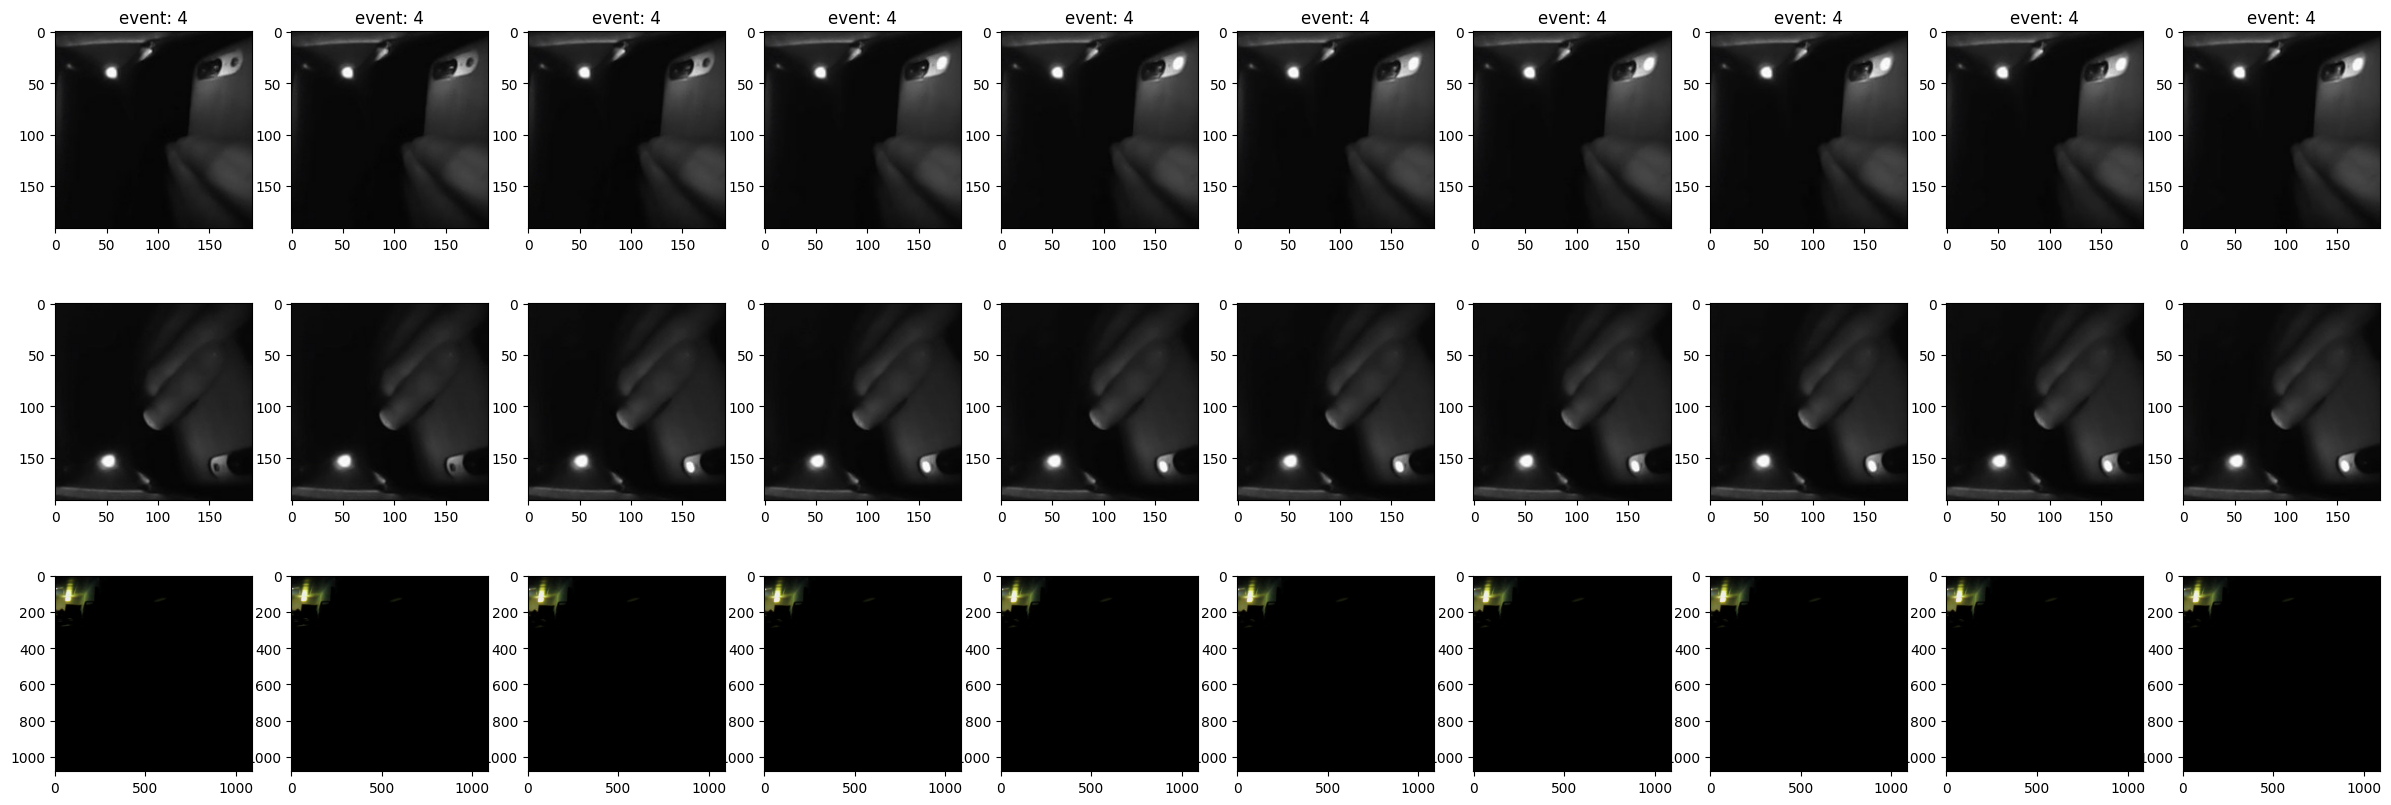

In [45]:
from matplotlib import pyplot as plt
from constants import *
import pandas as pd
import cv2
import numpy as np
import os
# recording: 9480f94c-6052-4d26-86b7-f2383bf34de3
#plot 3 images in a row from each camera, using the gaze with frames and events csv file and take the pictures from the frames folder respectively

#return 3 images from the gaze index
def plot_images_from_gaze(recording_id, gaze_index=3000):
    recording_folder = "recordings/" + recording_id + "/"
    gaze_df = pd.read_csv(recording_folder + "gaze_with_frames_and_events.csv")
    #get indices of the gaze line
    left_eye_frame = gaze_df['left_eye_frame'][gaze_index]
    right_eye_frame = gaze_df['right_eye_frame'][gaze_index]
    world_frame = gaze_df['world_frame'][gaze_index]

    #get the images from the frames folder
    left_eye_image = cv2.imread(recording_folder + camera_folders[0]  + '/' + str(left_eye_frame) + ".png")
    right_eye_image = cv2.imread(recording_folder + camera_folders[1]  + '/' + str(right_eye_frame) + ".png")
    world_image = cv2.imread(recording_folder + camera_folders[2]  + '/' + str(world_frame) + ".png")

    return left_eye_image, right_eye_image, world_image

def plot_10_images_from_gaze(recording_id, first_gaze_index=3000):
    fig, axs = plt.subplots(3, 10, figsize=(30, 10))
    for i in range(10):
        gaze_df = pd.read_csv("recordings/" + recording_id + "/gaze_with_frames_and_events.csv")
        left_eye_image, right_eye_image, world_image = plot_images_from_gaze(recording_id, first_gaze_index + i)
        events = gaze_df['events_frame'][first_gaze_index + i]
        axs[0, i].imshow(left_eye_image)
        axs[1, i].imshow(right_eye_image)
        axs[2, i].imshow(world_image)
        #add event_id to the image
        axs[0, i].set_title("event: " + str(events))
    plt.show()
        
plot_10_images_from_gaze("82e52db9-1cac-495d-99dd-bebb51c393a0", 3955)

Hello again,
so the .time files worked great to sync both eye cameras. Unfortunately the world camera timestamps are really far off from the actual video, there's like 15% more timestamps than frames in the video.

In [33]:
#read 82e52db9-1cac-495d-99dd-bebb51c393a0\PI left v1_sae_log_1.bin.bin
from constants import *
import numpy as np
def read_camera_logs(recording_id):
    recording_folder = "recordings/" + recording_id + "/"
    camera_logs = []
    camera_names = ["PI left v1", "PI right v1", "PI world v1"]
    for camera in camera_names[:2]:
        camera_logs.append(np.fromfile(recording_folder + camera + "_sae_log_1.bin.bin", dtype=np.uint8))
    return camera_logs

In [34]:
camera_logs = read_camera_logs("82e52db9-1cac-495d-99dd-bebb51c393a0")

In [41]:
len(camera_logs[1])

192

first world timestamp:
4366374351

4366395444

4366876549

In [55]:
(4366395444-4366876549)


-481105

In [35]:
from synchronisation import *
from constants import *
import os
%reload_ext autoreload
%autoreload 2
recording_id = "82e52db9-1cac-495d-99dd-bebb51c393a0"

left_ts = decode_timestamp(os.path.join(recordings_folder +  recording_id +  "/PI left v1 ps1.time"))
right_ts = decode_timestamp(os.path.join(recordings_folder + recording_id +  "/PI right v1 ps1.time"))
world_ts = decode_timestamp(os.path.join(recordings_folder + recording_id +  "/PI world v1 ps1.time"))

phone_times = get_first_frame_time(recording_id=recording_id)

#left_ts[0]
print(left_ts[0] - right_ts[0])
print(right_ts[0] - world_ts[0])
print(left_ts[0] - world_ts[0])

print(phone_times['PI right v1_recording_start_time'] - right_ts[0])
print(phone_times['PI left v1_recording_start_time'] - left_ts[0])
print(phone_times['PI world v1_recording_start_time'] - world_ts[0])

['PI left v1', 'PI right v1', 'PI world v1', 'Gaze']
03-26-2023 15:06:19.629
481105000
21093000
502198000
-132690944.0
-146796288.0
-981598208.0


this matches with the .time files

03-26 15:06:19.895 29534 29534 E RecWatchdogService: Start rec uri file:///storage/emulated/0/Documents/Pupil%20Invisible/9ae5e987-5235-486f-8552-427014bbedcd/82e52db9-1cac-495d-99dd-bebb51c393a0/PI%20right%20v1-raw-noup%20ps1.mjpeg sensor PI right v1-raw-noup

In [41]:
len(world_ts)

['PI left v1', 'PI right v1', 'PI world v1', 'Gaze']
03-26-2023 15:06:19.629


816

In [49]:
import time
tsone = world_ts[0] - world_ts[1]
#convert nanoseconds to human readable time with milliseconds
print(world_ts[0])
print(world_ts[1]- world_ts[0])

1679835979898598083
1679835979948855083


C:\Users\mathi\AppData\Local\Temp\ipykernel_12012\1250327226.py:2: RuntimeWarning: overflow encountered in scalar subtract
  tsone = world_ts[0] - world_ts[1]


In [29]:
recording_id = "82e52db9-1cac-495d-99dd-bebb51c393a0"
recording_folder = "recordings/" + recording_id + "/"

events_timestamps = decode_timestamp(recording_folder + "event.time")
events_df = pd.read_csv(recording_folder + "events.csv")

events_timestamps[0] - events_df['timestamp [ns]'][0]

0.0